In [3]:
__author__='Florin Bora'

import player
import game
import neural_network
import mcts
import board as b
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt


In [188]:
tree, edge_statistics = mcts.MCTS.get_tree_and_edges()

In [189]:
master_df = neural_network.create_data_from_mcts(edge_statistics)

wm = lambda x: np.average(x, weights=master_df.loc[x.index, "N"])
weightd_values = master_df.groupby(["final_state"])["value"].apply(wm).reset_index()
weightd_values.columns = ["final_state", "value_weighted"]
master_df = master_df.merge(weightd_values, on="final_state")
master_df.shape

(23580, 7)

In [190]:
master_df.head()

,final_state,value,N,init_state,move,inv_freq,value_weighted
0,o oxx x,0.5,4,o oxx x,6.0,2947.5,0.75
1,o oxx x,0.5,4,o oxx x,7.0,2947.5,0.75
2,o oxx x,0.5,4,o oxx x,2.0,2947.5,0.75
3,o oxx x,0.5,4,o oxx x,0.0,2947.5,0.75
4,o oxx x,1.0,4,o oxx x,6.0,2947.5,0.75


In [191]:
master_df["N"].sum()

246186

In [4]:
model = keras.models.load_model('./best_keras_model.tf')

In [24]:
board = b.Board()
board.str2arr('o o x   x')

array([[-1,  0, -1],
       [ 0,  1,  0],
       [ 0,  0,  1]])

In [9]:
test = np.array([[-1.,  1.,  1.],
          [ 1.,  0.,  1.],
          [-1., -1., -1.]])

n_map = {-1:"o", 0: " ", 1: "x"}

str_state = ''.join([n_map[i] for i in test.reshape(9,)])
str_state

pred, prob = model.predict(np.stack([[test]],-1))
print(pred.round(2))
prob.round(2)

[[1. 0. 0.]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
str_state

'oxxx xooo'

In [197]:
master_df[master_df["final_state"]==str_state]

,final_state,value,N,init_state,move,inv_freq,value_weighted


In [18]:
master_df["diff"] = master_df["value_weighted"] - master_df["value"]
master_df.sort_values("diff",inplace=True)
master_df.tail()

,final_state,value,N,init_state,move,inv_freq,value_weighted,diff
18015,xx oo,-1.0,1,xx oo,0.0,3194.333333,0.8,1.8
6743,x ox o,-1.0,1,x ox o,0.0,3194.333333,0.8,1.8
6744,x ox o,-1.0,1,x ox o,2.0,3194.333333,0.8,1.8
6745,x ox o,-1.0,1,x ox o,4.0,3194.333333,0.8,1.8
18016,xx oo,-1.0,1,xx oo,4.0,3194.333333,0.8,1.8


In [ ]:
master_df.tail(10).iloc[0]

In [ ]:
master_df.groupby()

In [ ]:
data_sample = master_df.sample(n=1000, weights='inv_freq', replace=True)
board = b.Board()

X = np.array(data_sample["final_state"])
X = np.array([board.str2arr(state) for state in X])

Y = np.array(data_sample["value"])
# convert policy move index to one hot array
Y_policy = np.eye(10)[np.array(data_sample["move"].values).astype(int)]

nb_classes = 3
targets = (Y+1)
one_hot_targets = np.eye(nb_classes)[targets.astype(int)]

X_clean = X
Y_value = Y

In [ ]:
X_final = np.stack([X_clean], axis=-1)

model.fit(X_final, [one_hot_targets, Y_policy], epochs=10, verbose=1)

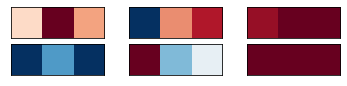

array([[-1.2273189, -1.0924002, -1.5413569]], dtype=float32)

In [5]:
filters = model.layers[1].get_weights()[0]
f_min, f_max = filters.min(), filters.max()
n_filters, ix = 6 , 1

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='RdBu', vmin = -1, vmax = 1)
        ix += 1

# show the figure
plt.show()
f[:, :, j]

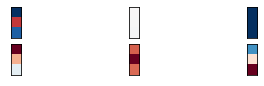

array([[ 0.60689455],
       [-0.14845832],
       [-1.763241  ]], dtype=float32)

In [6]:
filters = model.layers[2].get_weights()[0]
f_min, f_max = filters.min(), filters.max()
n_filters, ix = 6 , 1

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='RdBu', vmin = -1, vmax = 1)
        ix += 1

# show the figure
plt.show()
f[:, :, j]

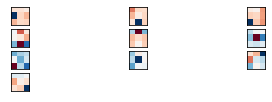

array([[ 0.12474504,  0.10184989,  0.0177197 ],
       [-0.39531317, -0.05994064, -0.15053509],
       [-0.14479466, -0.24550739,  2.3482192 ]], dtype=float32)

In [7]:
filters = model.layers[3].get_weights()[0]
f_min, f_max = filters.min(), filters.max()
n_filters, ix = 10 , 1

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='RdBu', vmin = -1, vmax = 1)
        ix += 1

# show the figure
plt.show()
f[:, :, j]